In [95]:
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
import numpy as np 
 

In [29]:
df_bigfive = pd.read_csv("big_five.csv")
df_iri = pd.read_csv("interpersonal_reactivity.csv")
df_posneg = pd.read_csv("positive_negative_effect.csv")
df_nfc = pd.read_csv("short_nfc.csv")
df_schwartz = pd.read_csv("short_schwartz.csv")
df_bigfive_cat = pd.read_csv("big_five_categories.csv")


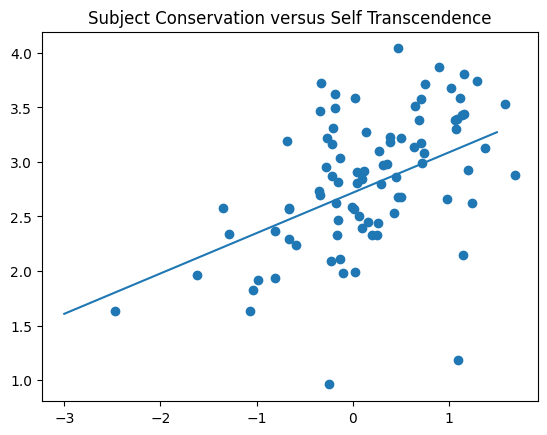

In [112]:

#coefficients for conservation and self-transcendence 
import sklearn.linear_model


cons_coefs =  [0.05, 0.06, -0.04, -0.09, -0.18, -0.16, 0.03, 0.16, 0.18, 0.11, 0.82]
st_coefs = [ 0.19, 0.14, -0.09, -0.11, 0.01, 0.10, 0.13, 0.07, 0.06, 0.02, -0.60]
conservation = []
selftranscendence = [] 
for index, row in df_schwartz.iterrows(): 
    #goes through each subject, and tracks conservation & self-transcendence 
    subject_cons = 0 
    subject_st = 0 
    for n in range(10):
        #weights each value 
        value = row.iloc[n+1]
        c = value * cons_coefs[n]
        st = value * st_coefs[n]
        subject_cons += c 
        subject_st += st
    #adds subject cons, st to list 
    conservation.append(subject_cons)
    selftranscendence.append(subject_st)

#scatter plot 
plt.scatter(conservation, selftranscendence)
plt.title("Subject Conservation versus Self Transcendence")
#creates linear model 
linearmodel = sklearn.linear_model.LinearRegression()
x = np.array(conservation).reshape(-1,1)
y = np.array(selftranscendence)
#train test split 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 69) 
#fits linear model 
linearmodel.fit(x_train, y_train)
#evenly spaced values for the model to use 
ls = np.linspace(-3, 1.5).reshape(-1,1)
y_lin_pred = linearmodel.predict(ls)
#y_pred = linearmodel.predict(x_test)
#r_squared_value = sklearn.metrics.r2_score(y_test, y_pred)
#plots the line 
plt.plot(ls, y_lin_pred )



In [43]:
def refq(data, question): 
    return data.iloc[:, question]


#preprocessing - reversing data for negative questions (5 -> 1, 2 -> 4, 3 -> 3, etc.) 
bigfive_rev = [2,4,6,8,12,14,19,21,23,27,29,31,35,37,39,43]
iri_rev = [3,4,7,12,13,14,15,18,19]
df_bigfive = df_bigfive.copy() 
df_iri = df_iri.copy() 
for i in bigfive_rev: 
    question = refq(df_bigfive, i)
    df_bigfive.iloc[:, i] = question.apply(lambda x : 6 - x)


for j in iri_rev: 
    question = refq(df_iri, j)
    df_iri.iloc[:, j] = question.apply(lambda x : 6 - x)
    






In [58]:

df_bigfive_cat_sorted = df_bigfive_cat.sort_values(by = ['categ'])
df_bigfive.iloc[:, [17,22]].head()


,A17.我想我自己是有寬容本質,A22.我想我自己是通常容易信賴他人
0,4,4
1,3,4
2,5,2
3,5,4
4,3,5


In [ ]:

df_bigfive_sorted = df_bigfive.sort_values(by = "A22.我想我自己是通常容易信賴他人")
df_bigfive_sorted.iloc[:, ]
#plt.scatter(refq(df_bigfive_sorted, 22), refq(df_bigfive, 17))

,sub#,A1.我想我自己是健談的,A2.我想我自己是傾向挑人毛病,A3. 我想我自己是會貫徹始終把事情做完,A4.我想我自己是憂鬱的,A5.我想我自己是會創新、有新想法,A6.我想我自己是沉默寡言,A7.我想我自己是樂於助人且無私的,A8.我想我自己是有點粗心,A9.我想我自己是放鬆的，善於處理壓力,...,A35.我想我自己是偏好例行性工作,A36.我想我自己是喜歡外出、好社交的,A37.我想我自己是有時會粗魯對待他人,A38.我想我自己是會訂計畫並依計畫執行,A39.我想我自己是容易感到緊張的,A40.我想我自己是喜歡思考、常有想法,A41.我想我自己是對於藝術興趣很低,A42.我想我自己是喜歡與他人合作,A43.我想我自己是易於分心的,A44.我想我自己是懂得藝術、音樂和文學
6,sub-07,5,2,2,2,5,1,4,4,2,...,4,5,1,1,3,5,1,5,5,5
19,sub-20,3,2,3,3,3,4,4,4,3,...,3,3,4,4,3,5,1,4,3,4
51,sub-56,2,5,2,2,3,3,1,5,4,...,1,3,4,2,3,3,2,3,4,4
46,sub-51,4,5,5,5,4,3,2,2,1,...,3,2,3,4,5,5,2,1,3,4
10,sub-11,4,3,5,3,4,4,3,2,4,...,4,2,2,4,3,4,1,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,sub-81,4,4,4,4,5,3,5,5,2,...,2,2,4,2,4,5,1,2,4,5
73,sub-78,4,5,5,5,5,4,5,5,2,...,1,4,5,1,5,4,1,3,5,4
68,sub-73,5,4,4,2,5,1,5,5,5,...,1,5,4,1,3,4,5,4,5,3
77,sub-82,2,1,3,1,3,4,3,3,5,...,3,2,1,2,1,3,4,3,4,3
